<a href="https://colab.research.google.com/github/Hamza1122/Face-Spoofing-Detection/blob/main/Untitled185.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt

from glob import glob
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.preprocessing import image
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [26]:
#data preprocessing example, to illustrate image transformations
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [27]:
IMAGE_SIZE = [150,150]

train_path = '/content/drive/MyDrive/new_dataset/Train'
valid_path = '/content/drive/MyDrive/new_dataset/Test'


In [28]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

In [29]:
folders = glob('/content/drive/MyDrive/new_dataset/Train/*')

x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [30]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [31]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/new_dataset/Train',
                                                 target_size = (150,150),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/new_dataset/Test',
                                            target_size = (150,150),
                                            batch_size = 64,
                                            class_mode = 'binary')


Found 2750 images belonging to 2 classes.
Found 2740 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
86/86 [==============================] - 538s 6s/step - loss: 0.0072 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 2/4
86/86 [==============================] - 533s 6s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/4
86/86 [==============================] - 538s 6s/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 9.9352e-04 - val_accuracy: 1.0000
Epoch 4/4
86/86 [==============================] - 539s 6s/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.0022 - val_accuracy: 1.0000


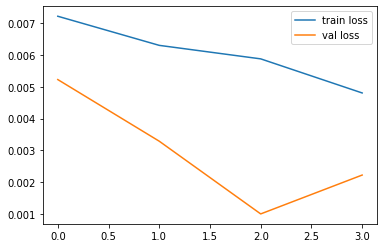

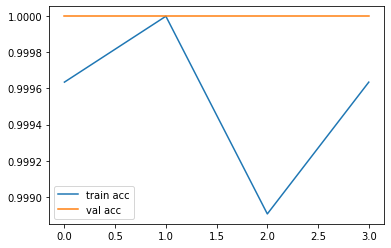

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('spoofing_new_model.h5')

In [17]:

# num_classes = 2

# my_new_model = Sequential()
# my_new_model.add(ResNet50(include_top=False, pooling='avg'))
# my_new_model.add(Dense(num_classes, activation='softmax'))

# my_new_model.layers[0].trainable = False

# my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# image_size = 224

# data_generator_with_aug = ImageDataGenerator(
#                                    horizontal_flip=True,
#                                    width_shift_range = 0.2,
#                                    height_shift_range = 0.2)

In [19]:
# train_generator = data_generator_with_aug.flow_from_directory(
#         train_path,
#         target_size=(image_size, image_size),
#         batch_size=24,
#         class_mode='categorical')

In [20]:
# data_generator_no_aug = ImageDataGenerator()

In [21]:
# validation_generator = data_generator_with_aug.flow_from_directory(valid_path,
#         target_size=(image_size, image_size),
#         class_mode='categorical')

In [22]:
# my_new_model.fit_generator(
#         train_generator,
#         steps_per_epoch=200,
#         epochs=2,
#         validation_data=validation_generator,
#         validation_steps=200)

In [23]:
# plt.plot(.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # accuracies
# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')